# Final Project - Video Games Sales

##### Data Link: https://www.kaggle.com/datasets/sidtwr/videogames-sales-dataset?select=Video_Games_Sales_as_at_22_Dec_2016.csv
___

<div>
  <img src="https://raw.githubusercontent.com/guyuliel/Data-Analysis-Project/main/images/image1.png" width="1000"/>
</div>


In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# **Introduction**
This dataset contains a list of video games with sales greater than 100,000 copies.

In [156]:
url = "https://raw.githubusercontent.com/guyuliel/Data-Analysis-Project/main/data.csv"
myfile = pd.read_csv(url)
myfile.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


##### ##The sales categories are displayed in Millions##

In [157]:
myfile.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

As we can see, there are 6 columns that contains more than 6500 missing values. Therefore, we chose to remove them from our data frame

In [158]:
myfile = myfile.iloc[:,0:10]
myfile.isnull().sum()

Name                 2
Platform             0
Year_of_Release    269
Genre                2
Publisher           54
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
dtype: int64

we want to find out the indexes of the mising names:

In [159]:
name_nan = myfile[["Name"]]
rows_with_nan = []
for index, row in name_nan.iterrows():
    is_nan_series = row.isnull()
    if is_nan_series.any():
        rows_with_nan.append(index)
rows_with_nan

[659, 14246]

In [160]:
myfile.shape

(16719, 10)

In [161]:
myfile.iloc[[659,14246]]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39
14246,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03


we found out that there are only two rows with NAN and also they contains the genre NAN's,so we decided to remove those 2 rows.

In [162]:
myfile.dropna(subset = "Name",inplace = True)
myfile.shape

(16717, 10)

In [163]:
myfile.isnull().sum()

Name                 0
Platform             0
Year_of_Release    269
Genre                0
Publisher           54
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
dtype: int64

for the publiher missing values, we intend to look for a publisher whose name is: "Unknown"

In [164]:
publisher_colunm = myfile[["Publisher"]]
publisher_colunm.loc[publisher_colunm["Publisher"]=="Unknown"].count()

Publisher    201
dtype: int64

we found out that there are 201 games without a known publisher. 
We will classify all 54 games with missing values, to the existing "Unknown" publisher

In [ ]:
myfile["Publisher"].fillna("Unknown",inplace = True)

In [166]:
publisher_colunm1 = myfile[["Publisher"]]
publisher_colunm1.loc[publisher_colunm1["Publisher"]=="Unknown"].count()

Publisher    255
dtype: int64

In [167]:
myfile.isnull().sum()

Name                 0
Platform             0
Year_of_Release    269
Genre                0
Publisher            0
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
dtype: int64

The last category left to fix is the year of release colunm.
as we can see we have got 269 missing years.
therefore, We decided to produce a fictitious year (2020) that would incorporate all the missing years


before that, we wanted to make sure all the values(except of the missing values), are numeric

In [168]:
myfile["Year_of_Release"].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

**Yes ! They are indeed numerical values.**

In [169]:
myfile.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16717 entries, 0 to 16718
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16717 non-null  object 
 2   Year_of_Release  16448 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16717 non-null  object 
 5   NA_Sales         16717 non-null  float64
 6   EU_Sales         16717 non-null  float64
 7   JP_Sales         16717 non-null  float64
 8   Other_Sales      16717 non-null  float64
 9   Global_Sales     16717 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


we are going to convert the year's type from float to an int

In [ ]:
myfile['Year_of_Release'].fillna("2020", inplace = True)
myfile['Year_of_Release']=myfile['Year_of_Release'].astype(int)
myfile.info()

In [171]:
myfile.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
dtype: int64

### Cleaned Data :

In [172]:
myfile

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01
16715,LMA Manager 2007,X360,2006,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01
16716,Haitaka no Psychedelica,PSV,2016,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01
16717,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01


---

# **Publisher's sales**
## ***Observation 1***

##### It is important to note that Nintendo is presented in our data frame as a publisher, but further ahaed we present all the consoles belonging to the Nintendo company(Not the publisher)

### Initially, we will research and focus on the publisher's global sales 
#####  we'll see the amount of games published and the total global sales(by milions), for each publisher



In [173]:
count_Pub = myfile.groupby(["Publisher"])[["Global_Sales"]].count().sort_values(by = "Publisher",ascending = False).reset_index()
count_Pub.rename(columns = {'Global_Sales':'Num_of_Games_of_Publisher'}, inplace = True)
count_Pub["Global_Sales"] = myfile.groupby(["Publisher"])[["Global_Sales"]].sum().sort_values(by = "Publisher",ascending = False).reset_index().iloc[:, 1:2]
count_Pub = count_Pub.sort_values(by = "Num_of_Games_of_Publisher",ascending = False).reset_index().drop(['index'], axis = 1)
count_Pub.head(7)

,Publisher,Num_of_Games_of_Publisher,Global_Sales
0,Electronic Arts,1356,1116.96
1,Activision,985,731.16
2,Namco Bandai Games,939,254.62
3,Ubisoft,933,471.61
4,Konami Digital Entertainment,834,282.39
5,THQ,715,338.44
6,Nintendo,706,1788.81


##### From our perspective, The critical information is the ratio between the amount of games released and the amount of its global sales over the years. 
##### **or in another words**, the sales per game (for each publisher who sold more than 150 copies)

In [174]:
count_Pub_sale=count_Pub.loc[(count_Pub.Num_of_Games_of_Publisher >150)].copy()
count_Pub_sale["Sales_Per_Game"] = count_Pub_sale["Global_Sales"]/count_Pub_sale["Num_of_Games_of_Publisher"]
count_Pub_sale = count_Pub_sale.sort_values(by = "Sales_Per_Game",ascending = False)
count_Pub_sale.head()

,Publisher,Num_of_Games_of_Publisher,Global_Sales,Sales_Per_Game
6,Nintendo,706,1788.81,2.533725
20,Microsoft Game Studios,191,248.32,1.300105
9,Take-Two Interactive,422,403.82,0.956919
7,Sony Computer Entertainment,687,606.48,0.882795
0,Electronic Arts,1356,1116.96,0.823717


##### Even thogh Nintendo(publisher) ranked **7th** in the amount of games released, they are leading the "Sales_Per_Game" category,by a significant margin ! 

###### This can be clearly seen from the graph below

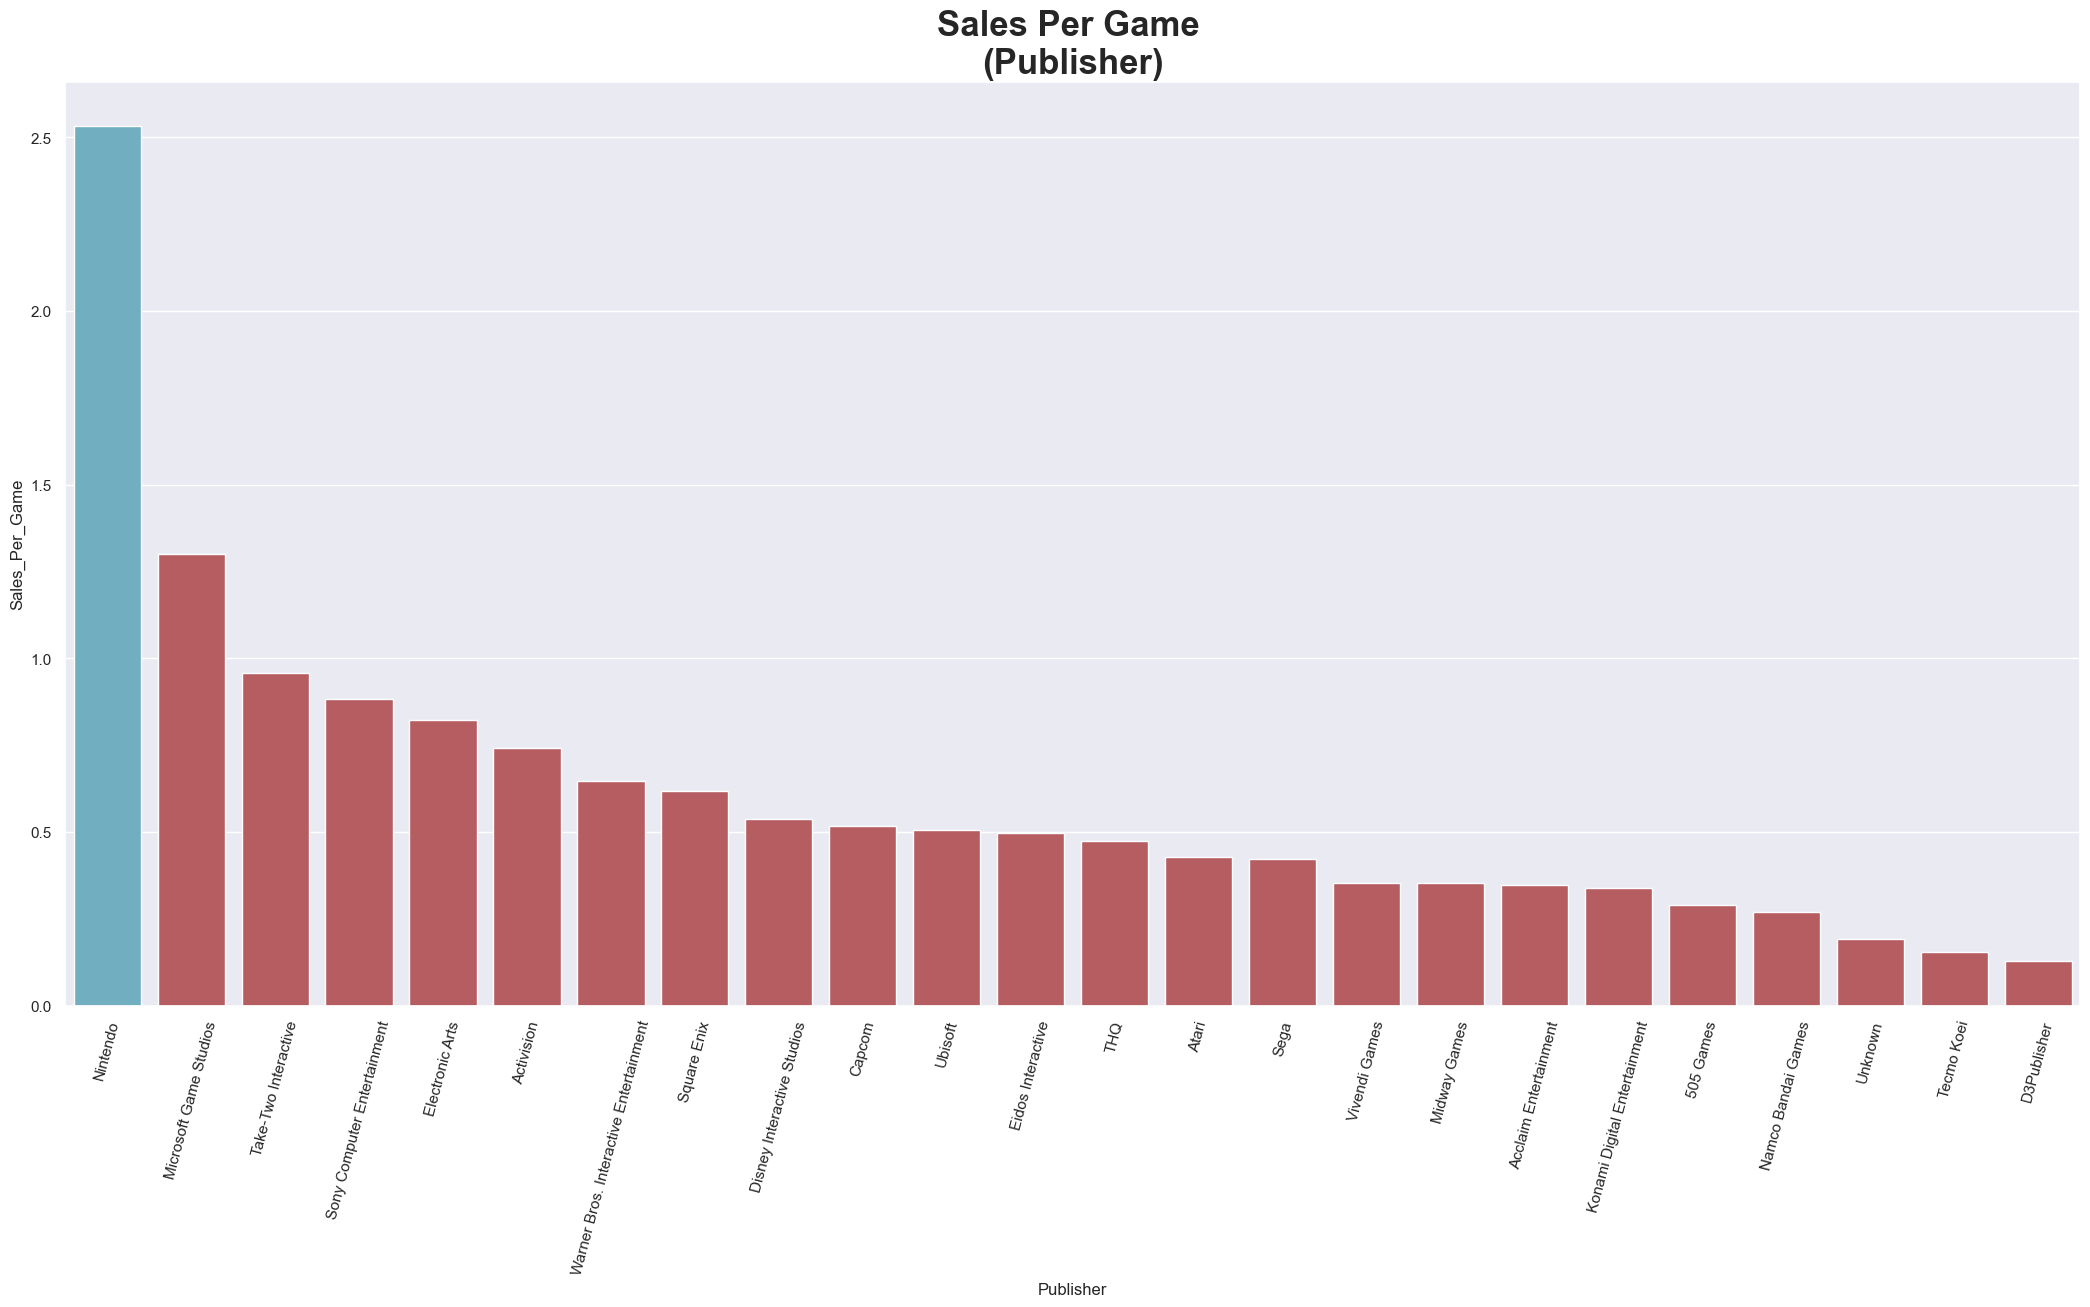

In [177]:
deep_palette = sns.color_palette('deep')

orange_color = deep_palette[9]
blue_color = deep_palette[3] 

custom_palette = {'first': orange_color, 'other': blue_color}


count_Pub_sale['Color'] = ['first'] + ['other'] * (len(count_Pub_sale) - 1)

# Create the bar plot
sns.set_theme(rc={'figure.figsize': (26, 12)})
sns.barplot(data=count_Pub_sale, x='Publisher', y='Sales_Per_Game', hue='Color', palette=custom_palette, dodge=False).set_title('Sales Per Game \n(Publisher)', size=25, fontweight="bold")

# Remove the legend
plt.legend([], [], frameon=False)

# Rotate x-axis labels
plt.xticks(rotation=75)

# Show the plot
plt.show()

### **Conclusion**
#### ***Nintendo*** has the highest ratio of sales per game.An average of 2.5 million copies for each game they publish.Almost more than twice from the second place

<Axes: >

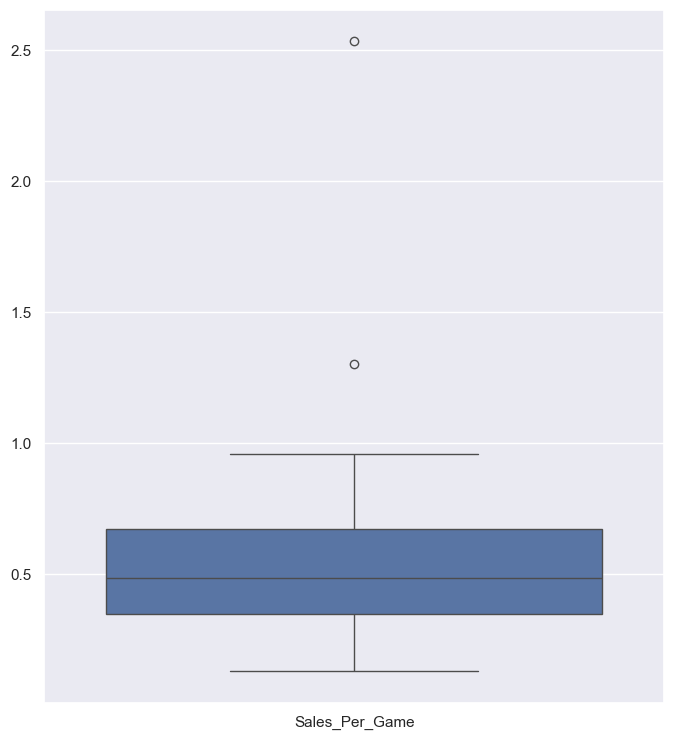

In [178]:
plt.figure(figsize=(8,9))
sns.boxplot(data = count_Pub_sale[['Sales_Per_Game']])

##### It can be seen that the median is at 0.5. It can also be seen that Nintendo is positioned in a very exceptional location, which symbolizes its success.

<div>
  <img src="https://raw.githubusercontent.com/guyuliel/Data-Analysis-Project/main/images/image2.jpg" width="500"/>
</div>


---

# **Platform comparison**
## ***Observation 2***


#### #1 Mobile comparison
#### #2 Stationary comparison

### Comparison between the mobile devices of Nintendo(company) and Sony

##### We want to find out what are the differences between Sony and Nintendo in total global sales over the years

In [179]:
PS_mobile= myfile.loc[(myfile.Platform == 'PSP') | (myfile.Platform == 'PSV')]
NIN_mobile= myfile.loc[(myfile.Platform == 'GB') | (myfile.Platform == 'GBA') | (myfile.Platform == 'DS') | (myfile.Platform == '3DS')]

In [180]:
sum_psmob1=PS_mobile.groupby('Platform')[['EU_Sales','JP_Sales','NA_Sales','Other_Sales','Global_Sales']].sum()
sum_psmob1.sort_values(by= 'Global_Sales',ascending=False)

,EU_Sales,JP_Sales,NA_Sales,Other_Sales,Global_Sales
Platform,,,,,
PSP,66.68,76.78,109.17,41.42,294.30
PSV,13.12,21.93,12.58,6.46,54.12


In [181]:
psmob = PS_mobile[["Platform","Global_Sales"]].reset_index().iloc[:,1:3]

df2 = pd.DataFrame({'Platform': ['Sony mobile devices'], 'Global_Sales': [psmob['Global_Sales'].sum()]})
psmob = pd.concat([psmob,df2],ignore_index = False,axis = 0)
psmob = psmob.tail(1)
psmob

,Platform,Global_Sales
0,Sony mobile devices,348.42


In [182]:
sum_ninmob1=NIN_mobile.groupby('Platform')[['EU_Sales','JP_Sales','NA_Sales','Other_Sales','Global_Sales']].sum()
sum_ninmob1.sort_values(by= 'Global_Sales',ascending=False)

,EU_Sales,JP_Sales,NA_Sales,Other_Sales,Global_Sales
Platform,,,,,
DS,188.89,175.57,382.67,59.28,807.10
GBA,75.25,47.33,187.54,7.73,318.50
3DS,61.48,100.67,83.49,13.36,259.09
GB,47.82,85.12,114.32,8.20,255.45


In [183]:
ninmob = NIN_mobile[["Platform","Global_Sales"]].reset_index().iloc[:,1:3]

df2 = pd.DataFrame({'Platform': ['Nintendo mobile devices'], 'Global_Sales': [ninmob['Global_Sales'].sum()]})
ninmob = pd.concat([psmob,df2],ignore_index = True,axis = 0)
ninmob = ninmob.tail(1)
ninmob

,Platform,Global_Sales
1,Nintendo mobile devices,1640.14


In [184]:
frames1 = [psmob, ninmob]
  
all_mobile = pd.concat(frames1)
all_mobile

,Platform,Global_Sales
0,Sony mobile devices,348.42
1,Nintendo mobile devices,1640.14


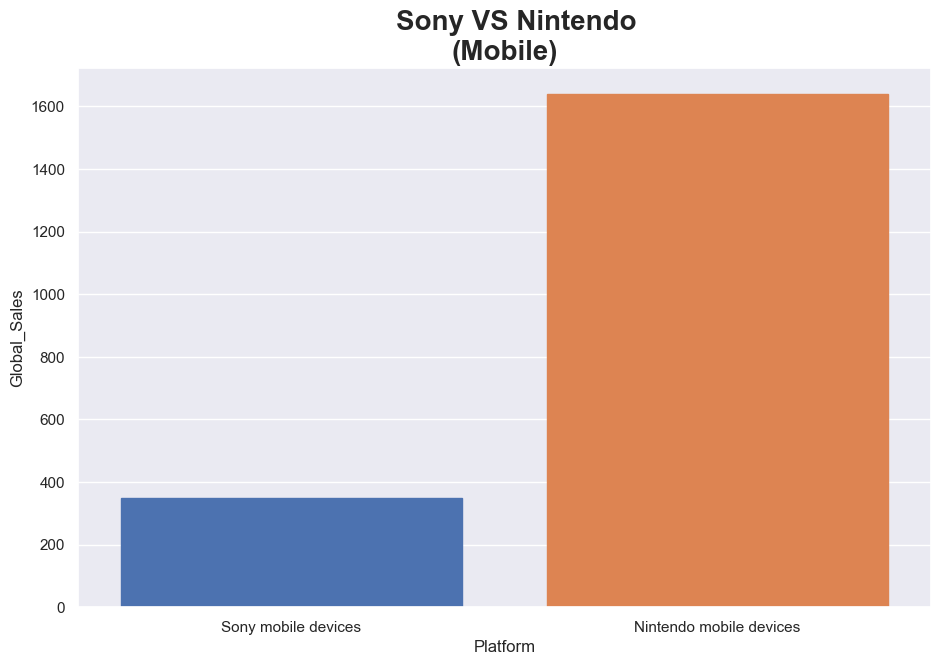

In [185]:
deep_palette = sns.color_palette('deep')

# Extract the 'blue' and 'orange' colors from the 'deep' palette
blue_color = deep_palette[0]    # 'blue' is the first color in the deep palette
orange_color = deep_palette[1]  # 'orange' is the second color in the deep palette

# Define custom colors: blue for the first bar, orange for the others
colors = [blue_color] + [orange_color] * (len(all_mobile) - 1)

# Create the bar plot
plt.figure(figsize=(11, 7))
ax = sns.barplot(x="Platform", y="Global_Sales", data=all_mobile)

# Set the title
ax.set_title('    Sony VS Nintendo \n(Mobile)', size=20, fontweight="bold")

# Iterate over the bars and set their colors
for i, bar in enumerate(ax.patches):
    bar.set_color(colors[i])

# Show the plot
plt.show()

##### The significant gap between Sony and Nintendo can be clearly seen !
##### Nintendo's mobile devices sold over 1.5 billion games copies compared to Sony's mobile devices that sold just 350 million games copies.
# <font color='firebrick'>K.O</font> for Sony PlayStation !

<div>
  <img src="https://raw.githubusercontent.com/guyuliel/Data-Analysis-Project/main/images/image 3.jpg" width="450"/>
</div>


### In addition, we are interested in testing whether Sony mobile devices has also failed in relation to the other platforms

In [186]:
count_comp_sale = myfile.groupby(["Platform"])[["Global_Sales"]].count().sort_values(by = "Platform",ascending = False).reset_index()
count_comp_sale.rename(columns = {'Global_Sales':'Num_of_Games'}, inplace = True)
count_comp_sale["Global_Sales"] = myfile.groupby(["Platform"])[["Global_Sales"]].sum().sort_values(by = "Platform",ascending = False).reset_index().iloc[:, 1:2]
count_comp_sale = count_comp_sale.sort_values(by = "Num_of_Games",ascending = False).reset_index().drop(['index'], axis = 1)
count_comp_sale.head()

,Platform,Num_of_Games,Global_Sales
0,PS2,2161,1255.64
1,DS,2152,807.10
2,PS3,1331,939.43
3,Wii,1320,908.13
4,X360,1262,971.63


##### We will investigate the correlation between the amount of games released and the amount of sales of each platform

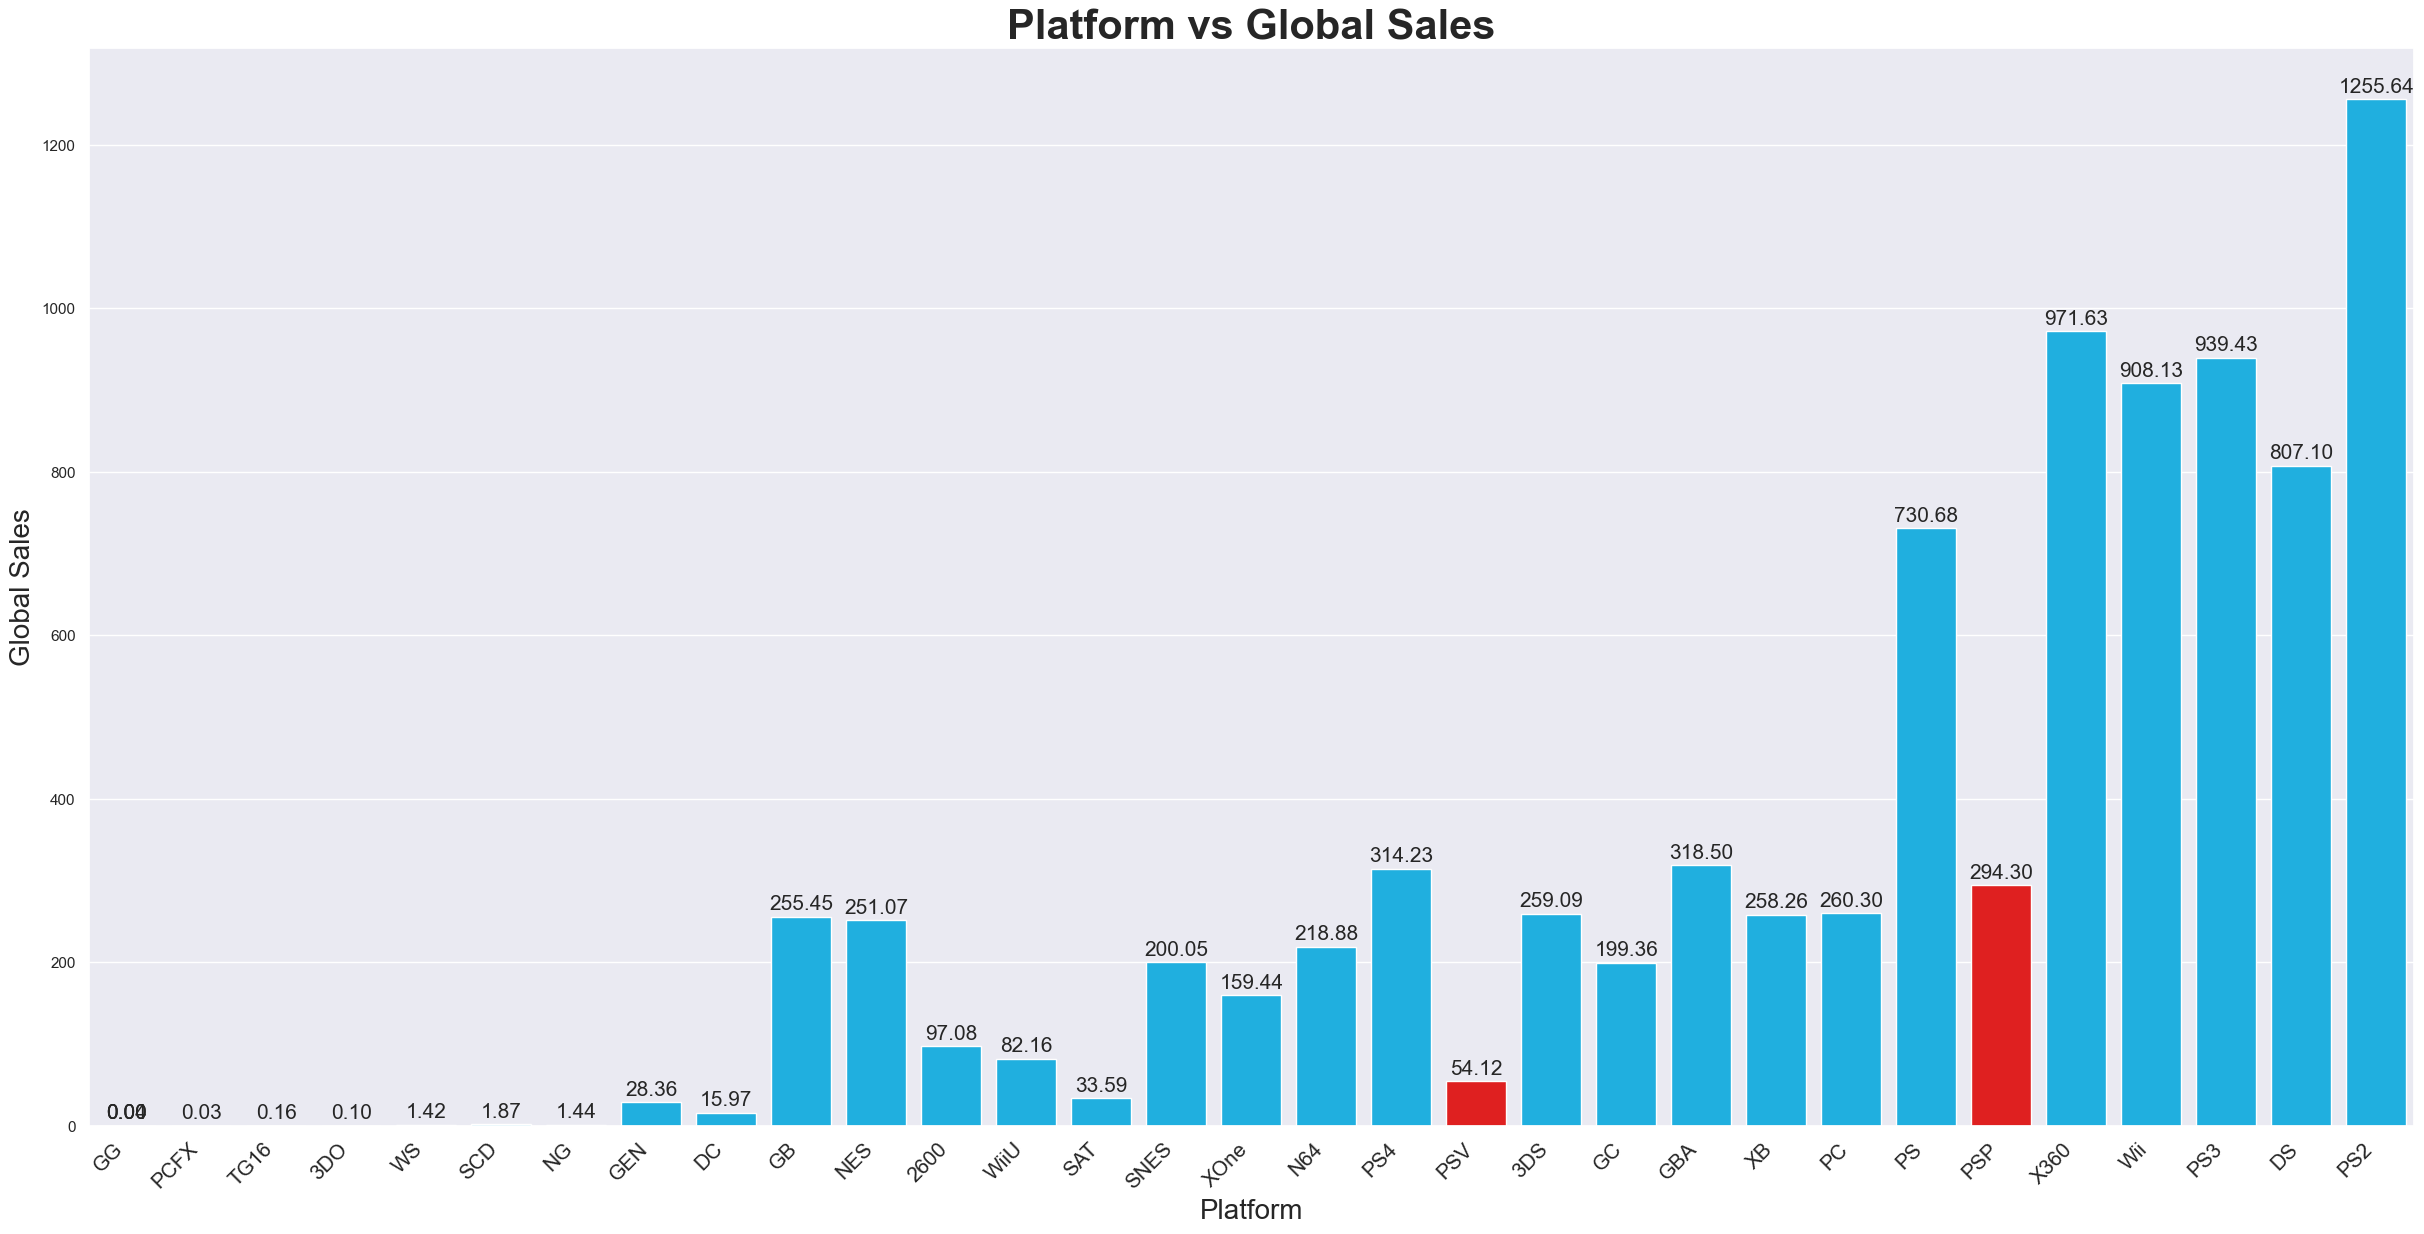

In [220]:
# Prepare the data
countcomp1 = count_comp_sale.sort_values(by="Num_of_Games", ascending=True).reset_index(drop=True)

# Create a new column for color mapping
countcomp1['Color'] = ['red' if x == 294.30 or x == 54.12 else 'deepskyblue' for x in countcomp1.Global_Sales]

# Create the bar plot
plt.figure(figsize=(30, 14))
ax = sns.barplot(data=countcomp1, x="Platform", y="Global_Sales", hue='Color', dodge=False, palette={'red': 'red', 'deepskyblue': 'deepskyblue'})

# Increase font sizes
ax.set_xlabel('Platform', fontsize=20)
ax.set_ylabel('Global Sales', fontsize=20)
ax.set_title('Platform vs Global Sales', fontsize=30, fontweight='bold')

# Set x-ticks and rotate x-axis labels for better readability
ax.set_xticks(range(len(countcomp1['Platform'])))
ax.set_xticklabels(countcomp1['Platform'], rotation=45, ha="right", fontsize=15)

# Add data labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=15)

# Remove the legend
ax.legend([], [], frameon=False)

# Show the plot
plt.show()

##### The graph shows all left-to-right platforms in ascending order, according to the number of games sold over the years.
##### PSV and PSP marked in red and We notice that The bar's height of PSV and PSP is very low in relation to the amount of games they had created.

### **Conclusion**
#### Sony's mobile devices have failed miserably over the years in relation to all platforms !
#####


so let's continue to the stationary devices..

### Comparison between the stationary consoles of Nintendo, Sony and Xbox
#### We want to find out what are the differences between Nintendo, Sony and Xbox in total global sales over the years

In [188]:
PS_staionary= myfile.loc[(myfile.Platform == 'PS') | (myfile.Platform == 'PS2') | (myfile.Platform == 'PS3') | (myfile.Platform == 'PS4')]
NIN_staionary= myfile.loc[(myfile.Platform == 'Wii') | (myfile.Platform == 'WiiU') | (myfile.Platform == 'NES') | (myfile.Platform == 'SNES') | (myfile.Platform == 'N64') | (myfile.Platform == 'GC')]
XB_staionary= myfile.loc[(myfile.Platform == 'XB') | (myfile.Platform == 'X360') | (myfile.Platform == 'XOne')]

In [189]:
sum_psst1=PS_staionary.groupby('Platform')[['EU_Sales','JP_Sales','NA_Sales','Other_Sales','Global_Sales']].sum()
sum_psst1.sort_values(by= 'Global_Sales',ascending=False)

,EU_Sales,JP_Sales,NA_Sales,Other_Sales,Global_Sales
Platform,,,,,
PS2,339.29,139.20,583.84,193.44,1255.64
PS3,330.29,80.19,393.49,135.68,939.43
PS,213.61,139.82,336.52,40.91,730.68
PS4,141.09,16.00,108.74,48.35,314.23


In [190]:
psst = PS_staionary[["Platform","Global_Sales"]].reset_index().iloc[:,1:3]


df2 = pd.DataFrame({'Platform': ['Sony staionary devices'], 'Global_Sales': [psst['Global_Sales'].sum()]})
psst = pd.concat([psst,df2],ignore_index = False ,axis = 0)
psst = psst.tail(1)
psst

,Platform,Global_Sales
0,Sony staionary devices,3239.98


In [191]:
sum_ninst1=NIN_staionary.groupby('Platform')[['EU_Sales','JP_Sales','NA_Sales','Other_Sales','Global_Sales']].sum()
sum_ninst1.sort_values(by= 'Global_Sales',ascending=False)

,EU_Sales,JP_Sales,NA_Sales,Other_Sales,Global_Sales
Platform,,,,,
Wii,262.21,69.33,496.90,79.07,908.13
NES,21.15,98.65,125.94,5.31,251.07
N64,41.06,34.22,139.02,4.38,218.88
SNES,19.04,116.55,61.23,3.22,200.05
GC,38.71,21.58,133.46,5.18,199.36
WiiU,25.13,13.01,38.10,5.95,82.16


In [192]:
ninst = NIN_staionary[["Platform","Global_Sales"]].reset_index().iloc[:,1:3]

df2 = pd.DataFrame({'Platform': ['Nintendo staionary devices'], 'Global_Sales': [ninst['Global_Sales'].sum()]})
ninst = pd.concat([psst,df2],ignore_index = True,axis = 0)
ninst = ninst.tail(1)
ninst

,Platform,Global_Sales
1,Nintendo staionary devices,1859.65


In [193]:
sum_xbst1=XB_staionary.groupby('Platform')[['EU_Sales','JP_Sales','NA_Sales','Other_Sales','Global_Sales']].sum()
sum_xbst1.sort_values(by= 'Global_Sales',ascending=False)

,EU_Sales,JP_Sales,NA_Sales,Other_Sales,Global_Sales
Platform,,,,,
X360,270.76,12.43,602.47,85.76,971.63
XB,60.95,1.38,186.69,8.72,258.26
XOne,51.59,0.34,93.12,14.27,159.44


In [194]:
xbst = XB_staionary[["Platform","Global_Sales"]].reset_index().iloc[:,1:3]


df2 = pd.DataFrame({'Platform': ['Xbox staionary devices'], 'Global_Sales': [xbst['Global_Sales'].sum()]})
xbst = pd.concat([psst,ninst,df2],ignore_index = True,axis = 0)
xbst = xbst.tail(1)
xbst

,Platform,Global_Sales
2,Xbox staionary devices,1389.33


In [195]:
frames2 = [psst, ninst,xbst]
  
all_staionary = pd.concat(frames2)
all_staionary

,Platform,Global_Sales
0,Sony staionary devices,3239.98
1,Nintendo staionary devices,1859.65
2,Xbox staionary devices,1389.33


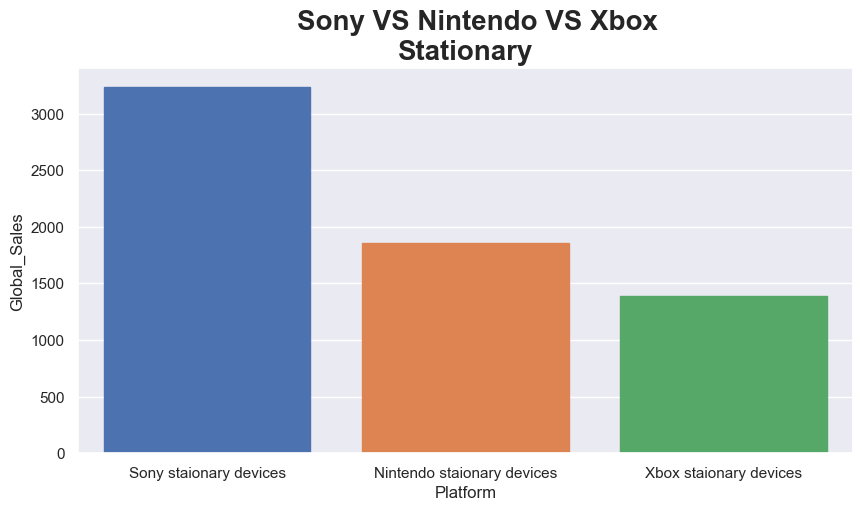

In [224]:
# Get the 'deep' color palette
deep_palette = sns.color_palette('deep')

# Extract the specific colors from the 'deep' palette
blue_color = deep_palette[0]   # First bar (default blue)
orange_color = deep_palette[1] # Middle bar (orange)
green_color = deep_palette[2]  # Right bar (green)

# Define custom colors
colors = [blue_color, orange_color, green_color]

# Create the bar plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="Platform", y="Global_Sales", data=all_staionary)

# Set the title
ax.set_title('    Sony VS Nintendo VS Xbox \nStationary', size=20, fontweight="bold")

# Iterate over the bars and set their colors
for i, bar in enumerate(ax.patches):
    bar.set_color(colors[i])

# Show the plot
plt.show()

##### It can be seen that ***Sony stationary consoles are the leading platform*** in the global sales market. We also conclude that Xbox does not constitute real competition.

<div>
  <img src="https://raw.githubusercontent.com/guyuliel/Data-Analysis-Project/main/images/image 4.jpg" width="500"/>
</div>


### We will check the amount of all global sales between the stationary consoles of Sony and Nintendo ***for each year separately***.
#### Between 1994-2016

In [197]:
ninfile = myfile.loc[(myfile.Platform == 'Wii') | (myfile.Platform == 'WiiU') | (myfile.Platform == 'NES') | (myfile.Platform == 'SNES') | (myfile.Platform == 'N64') | (myfile.Platform == 'GC')]
nin_group = ninfile.groupby("Year_of_Release")[['Global_Sales']].sum().reset_index()
nin_group.rename(columns = {'Global_Sales':'Total_NIN'},inplace= True)
nin_group = nin_group.iloc[11:34].reset_index()
nin_group = nin_group.iloc[:,1:]

In [198]:
psfile = myfile[(myfile["Platform"]=="PS")|(myfile["Platform"]== "PS2") | (myfile["Platform"]=="PS3") |(myfile["Platform"]=="PS4")]
ps_group = psfile.groupby("Year_of_Release")[['Global_Sales']].sum().reset_index()
ps_group.rename(columns = {'Global_Sales':'Total_PS'}, inplace = True)

In [199]:
ps_nin = ps_group
ps_nin = ps_nin.reset_index()
ps_nin = ps_nin[["Year_of_Release","Total_PS"]]
ps_nin["Total_NIN"] = nin_group[["Total_NIN"]]
ps_nin = ps_nin.fillna(0).iloc[:23]
ps_nin.tail()

,Year_of_Release,Total_PS,Total_NIN
18,2012,107.27,39.25
19,2013,139.14,30.28
20,2014,147.60,25.78
21,2015,135.83,17.47
22,2016,72.87,4.76


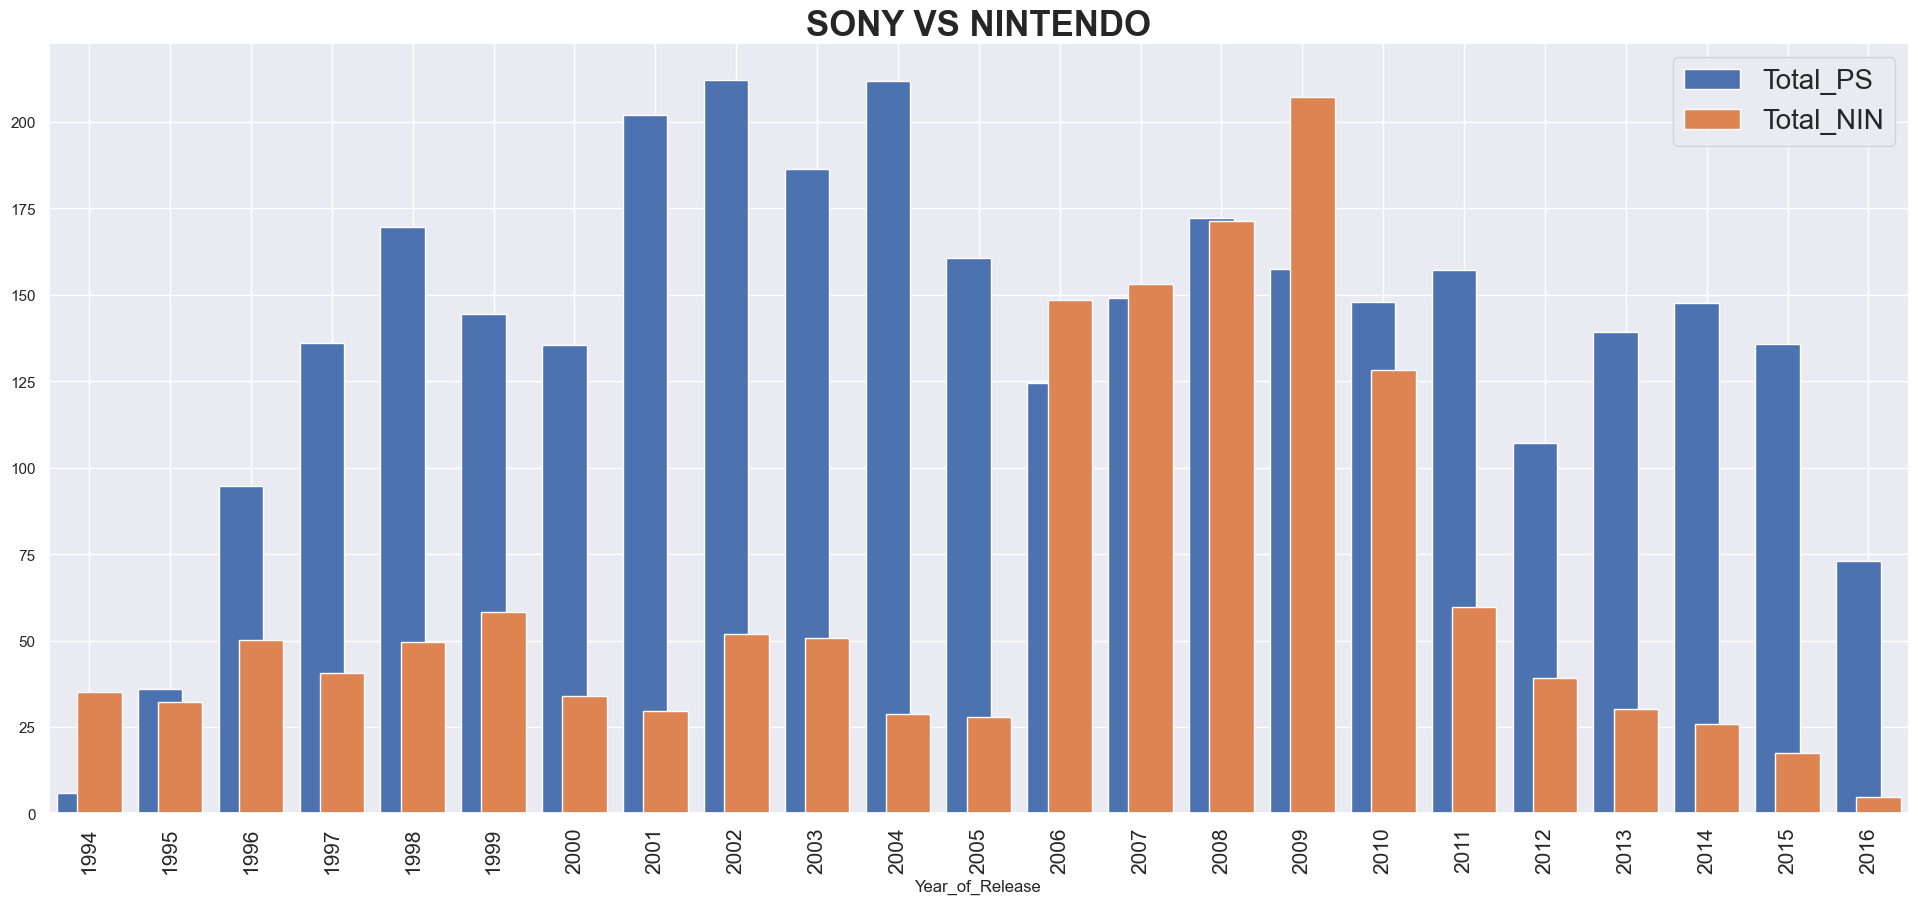

In [225]:
# Group by Year_of_Release and sum the values
ps_nin = ps_nin.groupby('Year_of_Release')[['Total_PS', 'Total_NIN']].sum()

# Create the bar plot
ax = ps_nin.plot.bar(figsize=(24, 10))
ax.set_title('SONY VS NINTENDO', size=25, fontweight="bold")

# Set legend font size
plt.legend(fontsize=20)

# Function to change bar width
def change_width(ax, new_value):
    for patch in ax.patches:
        current_width = patch.get_width()
        diff = current_width - new_value

        patch.set_width(new_value)
        patch.set_x(patch.get_x() + diff * .5)

# Apply the change_width function
change_width(ax, .55)

# Set x-ticks and adjust font size for better readability
ax.set_xticks(range(len(ps_nin.index)))
ax.set_xticklabels(ps_nin.index, ha="center", fontsize=15)

# Show the plot
plt.show()

In [201]:
Wii_file = myfile.loc[(myfile.Platform == 'Wii')]
Wii_file['Year_of_Release'].min()

2006

### **Conclusion**

#### 1. since SonyPlaystation started to release video games for stores, it can be seen that it was gifted with great success, and its total global sales were much higher than Nintendo.
#### 2. therefore we notice from the graph, that in 2006 there is a significant raise in Nintendo's global sales. That is because in 2006 WII console was released, that raised the global sales volume and even passed SonyPlaystation between the years 2006-2009
#####

### *In order to determine the battle between those 2 video games giants, we will merge the global sales data of the mobile devices with the stationary consoles.*
##### we can't wait to see the results.... 

In [202]:
group_sales = myfile.groupby("Platform")[["Global_Sales"]].sum().sort_values(by = "Global_Sales",ascending = False).reset_index()

In [203]:
tot_sales = group_sales["Global_Sales"].sum()
group_sales["%Global_Sales%"] = (group_sales["Global_Sales"])/tot_sales.copy()
group_sales.head()

,Platform,Global_Sales,%Global_Sales%
0,PS2,1255.64,0.140800
1,X360,971.63,0.108953
2,PS3,939.43,0.105342
3,Wii,908.13,0.101832
4,DS,807.10,0.090504


In [204]:
psfile1 = group_sales[(group_sales["Platform"]=="PS")|(group_sales["Platform"]== "PS2") | (group_sales["Platform"]=="PS3") |(group_sales["Platform"]=="PS4") |(group_sales["Platform"]=="PSP") | (group_sales["Platform"]=="PSV")]
psfile1["%Global_Sales%"].sum().round(3)

0.402

In [205]:
ninfile1 = group_sales[(group_sales["Platform"]=="Wii")|(group_sales["Platform"]== "DS") | (group_sales["Platform"]=="WiiU") |(group_sales["Platform"]=="NES") |(group_sales["Platform"]=="SNES") | (group_sales["Platform"]=="N64")|(group_sales["Platform"]== "GBA") |(group_sales["Platform"]== "3DS") |(group_sales["Platform"]== "GC") |(group_sales["Platform"]== "GB")]
ninfile1["%Global_Sales%"].sum().round(3)

0.392

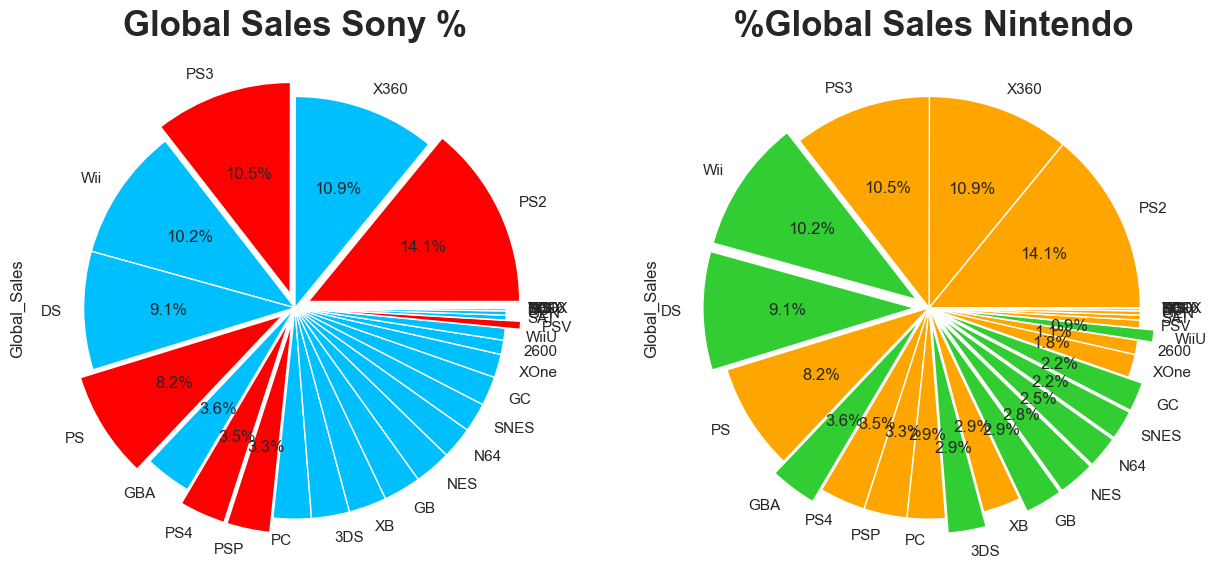

In [206]:
plt.subplot(1,2,1)
def autopct(pct): 
    return ('%.1f%%' % pct) if pct > 3 else""
explode = (0.07,0,0.07,0,0,0.07,0,0.07,0.07,0,0,0,0,0,0,0,0,0,0,0,0.07,0,0,0,0,0,0,0,0,0,0)
plt.title("Global Sales Sony %",fontweight ="bold",fontsize=25)
colors = ["deepskyblue" if (x!="PS" and x!="PS2" and x!="PS3" and x!="PS4" and x!="PSP" and x!="PSV") else 'red' for x in group_sales.Platform]
ax = group_sales["Global_Sales"].plot(kind='pie', figsize=(15,12), autopct=autopct,labels=group_sales["Platform"],explode = explode,colors = colors)


plt.subplot(1,2,2)
def autopct(pct): 
    return ('%.1f%%' % pct) if pct > 0.7 else""
explode = (0,0,0,0.07,0.07,0,0.07,0,0,0,0.07,0,0.07,0.07,0.07,0.07,0.07,0,0,0.07,0,0,0,0,0,0,0,0,0,0,0)
plt.title(" %Global Sales Nintendo",fontweight ="bold",fontsize=25)
colors = ["orange" if (x!="Wii" and x!="DS" and x!="WiiU" and x!="NES" and x!="SNES" and x!= "N64" and x!="GBA" and x!="3DS" and x!="GB" and x!="GC") else 'limegreen' for x in group_sales.Platform]
ax = group_sales["Global_Sales"].plot(kind='pie', figsize=(15,12), autopct=autopct,labels=group_sales["Platform"],explode = explode,colors = colors)
plt.show()

### **Conclusion** 
#### ****it's a TIE!!!**** almost...
##### The Total Global Sales of Sony constitutes **40.02%** of the total global sales.
##### The Total Global Sales of Nintendo constitutes **39.2%** percent of the total global sales

### Both companies are Originally from ***Japan***

### Sony and Nintendo are The most succesfull companies for video games (make up about ***80%*** of the global market share)

<div>
  <img src="https://raw.githubusercontent.com/guyuliel/Data-Analysis-Project/main/images/image 5.jpg" width="500"/>
</div>


---

# **Comparison between areas**
## ***Observation 3***

### We will examine differences in purchases by genres divided into purchase areas:


In [207]:
features = myfile[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
All_Sales = features.groupby('Genre').sum().reset_index()
All_Sales["Precent_NA_Sales"]=((All_Sales["NA_Sales"])/(All_Sales["Global_Sales"])*100).round(3)
All_Sales["Precent_EU_Sales"]=((All_Sales["EU_Sales"])/(All_Sales["Global_Sales"])*100).round(3)
All_Sales["Precent_JP_Sales"]=((All_Sales["JP_Sales"])/(All_Sales["Global_Sales"])*100).round(3)
All_Sales["Precent_Other_Sales_Sales"]=((All_Sales["Other_Sales"])/(All_Sales["Global_Sales"])*100).round(3)

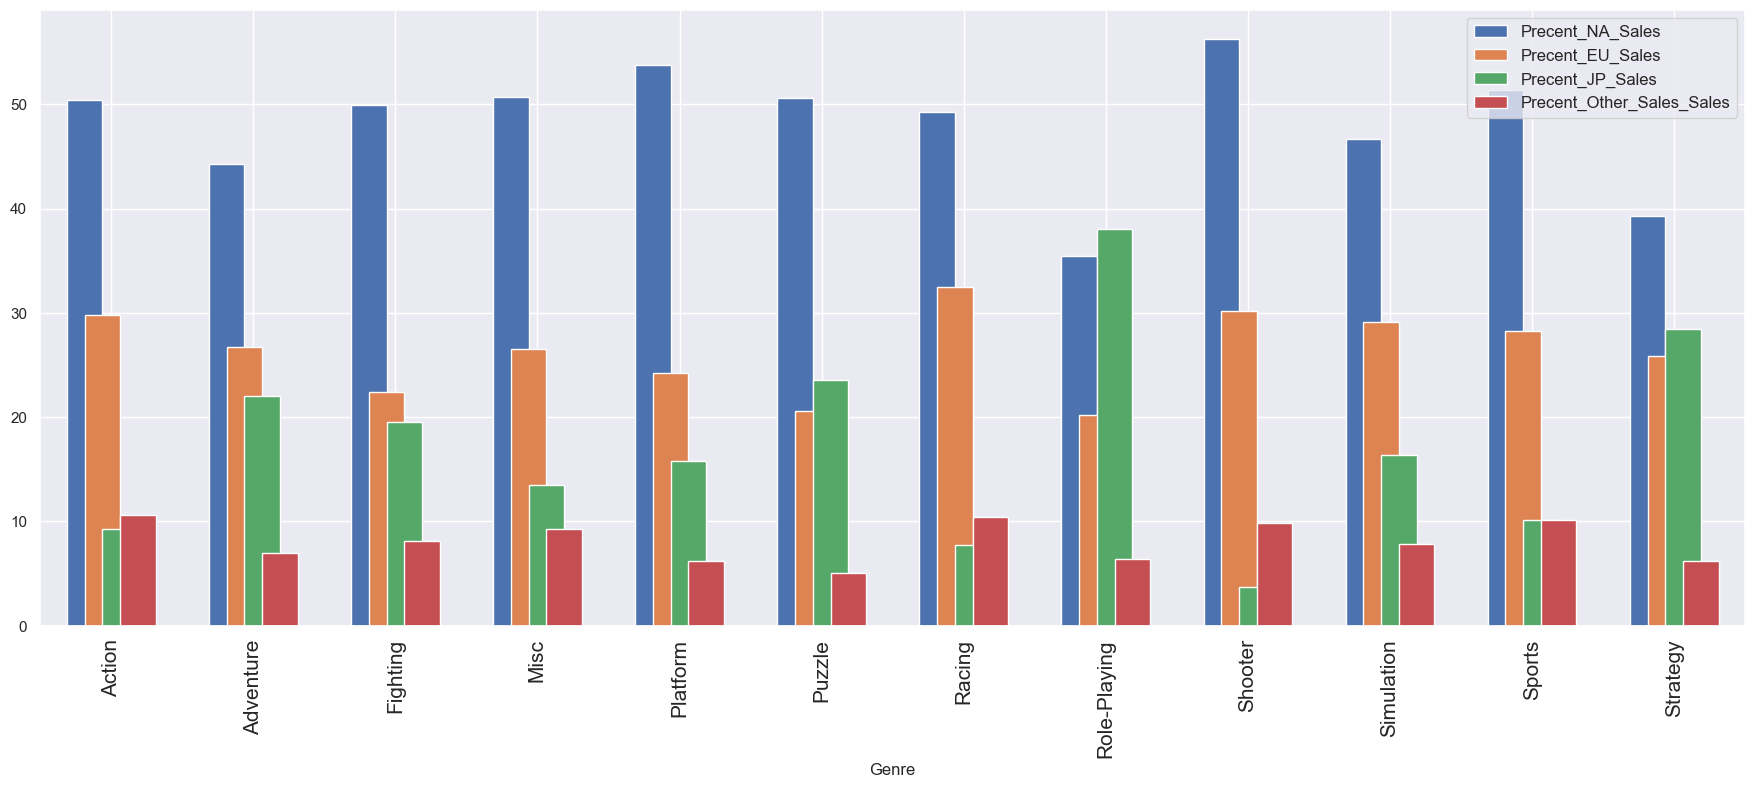

In [226]:
# Group by Genre and sum the values
illustration = All_Sales.groupby('Genre')[["Precent_NA_Sales", "Precent_EU_Sales", "Precent_JP_Sales", "Precent_Other_Sales_Sales"]].sum()

# Create the bar plot
ax = illustration.plot.bar(figsize=(22, 8))
plt.legend(fontsize=12)

# Function to change bar width
def change_width(ax, new_value):
    for patch in ax.patches:
        current_width = patch.get_width()
        diff = current_width - new_value

        patch.set_width(new_value)
        patch.set_x(patch.get_x() + diff * .5)

# Apply the change_width function
change_width(ax, .25)

# Set x-ticks and adjust font size for better readability
ax.set_xticks(range(len(illustration.index)))
ax.set_xticklabels(illustration.index, ha="center", fontsize=15)

# Show the plot
plt.show()

##### From this plot we can understand the size of the American market. it constitutes a huge part of the total global sales. it noticeable in every genre. almost 50% of all sales except in one genre

### Once we understood the size of the US market we will continue to go into the depths of this market and we will get more insights on it

In [209]:
Most_Sale_Platform_Global_Sales = myfile[['Platform','Global_Sales']].groupby('Platform').sum().sort_values('Global_Sales',ascending= False).reset_index()
Most_Sale_Platform_Global_Sales = Most_Sale_Platform_Global_Sales.head()
Most_Sale_Platform_NA = myfile[['Platform','NA_Sales']].groupby('Platform').sum().sort_values('NA_Sales',ascending= False).reset_index()
Most_Sale_Platform_NA = Most_Sale_Platform_NA.head()

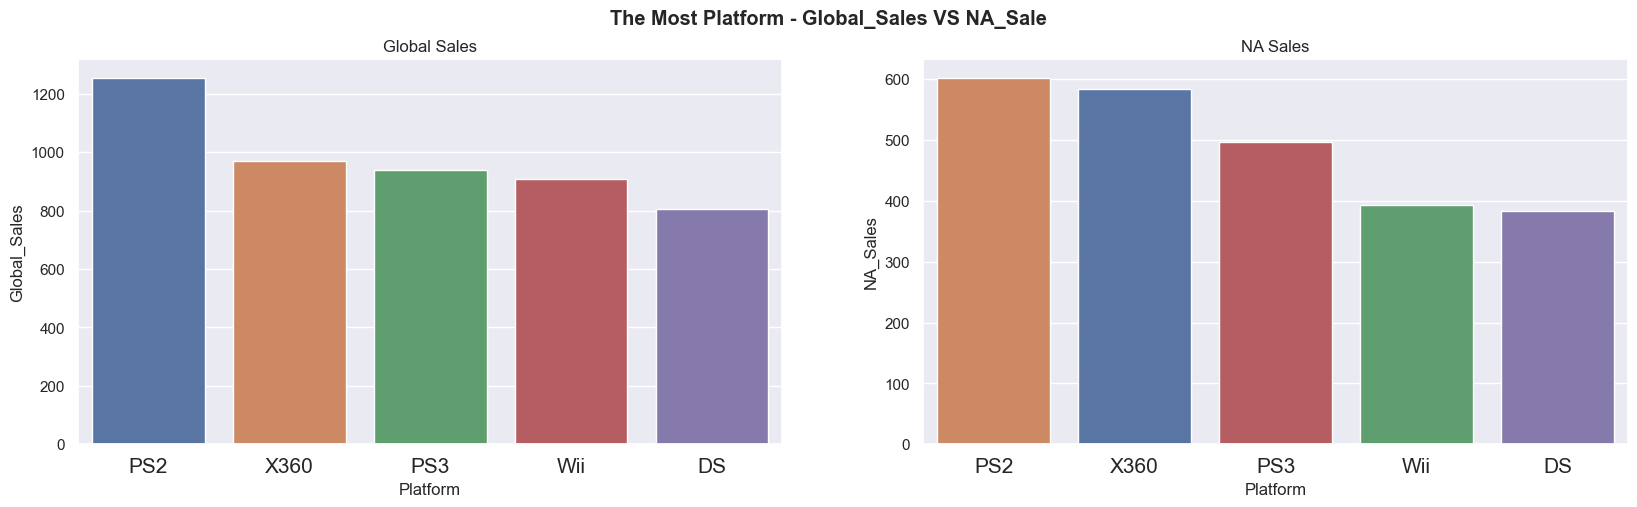

In [227]:
# Get unique platforms
platforms = Most_Sale_Platform_Global_Sales['Platform'].unique()

# Generate a color palette with distinct colors
palette = sns.color_palette('deep', len(platforms))

# Create a dictionary mapping platforms to colors
platform_colors = {platform: color for platform, color in zip(platforms, palette)}

# Create subplots
fig, axes = plt.subplots(figsize=(20, 5), ncols=2)
fig.suptitle("The Most Platform - Global_Sales VS NA_Sale", fontweight="bold")

# Plot for Global Sales
sns.barplot(ax=axes[0], data=Most_Sale_Platform_Global_Sales, x='Platform', y='Global_Sales', hue='Platform', dodge=False, palette=platform_colors)
axes[0].legend([], [], frameon=False)  # Remove the legend
axes[0].set_title('Global Sales')

# Plot for NA Sales
sns.barplot(ax=axes[1], data=Most_Sale_Platform_NA, x='Platform', y='NA_Sales', hue='Platform', dodge=False, palette=platform_colors)
axes[1].legend([], [], frameon=False)  # Remove the legend
axes[1].set_title('NA Sales')

# Set x-ticks and labels for both plots
for ax in axes:
    ax.set_xticks(range(len(platforms)))
    ax.set_xticklabels(platforms, ha="center", fontsize=15)

# Show the plot
plt.show()

##### After realizing that the US market is considered a large share (50%) of all global sales we wanted to check if this percentage also overlaps with the best selling consoles in the world. and the answer is **yes**! we can see from the graphs that the best selling consoles in the world are the same consoles who sold in the US. that insight clearly illustrates the impact of the American market on the world 

### We want to check whether there is a difference in the popularity of the genres between the Eastern culture and Western culture

In [211]:
# Calculate the division by genre in percentage
NA_Sales_Genre = myfile[["Genre", "NA_Sales"]].groupby("Genre").sum().reset_index()
NA_Sales_Sum = NA_Sales_Genre["NA_Sales"].sum()
NA_Sales_Genre['Division by genre in %'] = (((NA_Sales_Genre["NA_Sales"]) / NA_Sales_Sum) * 100).round(3)
NA_Sales_Genre = NA_Sales_Genre.sort_values(by='Division by genre in %', ascending=False).reset_index().iloc[:, 1:]

# Define the styling function
def Top3(s):
    if s["Division by genre in %"] > 13:
        return ['background-color: turquoise; color: black'] * len(s)
    else:
        return ['background-color: white; color: black'] * len(s)

# Apply the styling function
styled_df = NA_Sales_Genre.style.apply(Top3, axis=1)

# Display the styled DataFrame
styled_df

,Genre,NA_Sales,Division by genre in %
0,Action,879.010000,19.974000
1,Sports,684.430000,15.552000
2,Shooter,592.240000,13.457000
3,Platform,445.500000,10.123000
4,Misc,407.270000,9.254000
5,Racing,359.350000,8.165000
6,Role-Playing,330.810000,7.517000
7,Fighting,223.360000,5.075000
8,Simulation,182.190000,4.140000
9,Puzzle,122.870000,2.792000


In [212]:
# Calculate the division by genre in percentage for EU Sales
EU_Sales_Genre = myfile[["Genre", "EU_Sales"]].groupby("Genre").sum().reset_index()
EU_Sales_Sum = EU_Sales_Genre["EU_Sales"].sum()
EU_Sales_Genre['Division by genre in %'] = (((EU_Sales_Genre["EU_Sales"]) / EU_Sales_Sum) * 100).round(3)
EU_Sales_Genre = EU_Sales_Genre.sort_values(by='Division by genre in %', ascending=False).reset_index().iloc[:, 1:]

# Define the styling function
def Top3(s):
    if s["Division by genre in %"] > 13:
        return ['background-color: turquoise; color: black'] * len(s)
    else:
        return ['background-color: white; color: black'] * len(s)

# Apply the styling function
styled_df = EU_Sales_Genre.style.apply(Top3, axis=1)

# Display the styled DataFrame
styled_df

,Genre,EU_Sales,Division by genre in %
0,Action,519.130000,21.415000
1,Sports,376.790000,15.543000
2,Shooter,317.340000,13.091000
3,Racing,236.510000,9.756000
4,Misc,212.740000,8.776000
5,Platform,200.350000,8.265000
6,Role-Playing,188.710000,7.785000
7,Simulation,113.520000,4.683000
8,Fighting,100.330000,4.139000
9,Adventure,63.540000,2.621000


In [213]:
# Calculate the division by genre in percentage for JP Sales
JP_Sales_Genre = myfile[["Genre", "JP_Sales"]].groupby("Genre").sum().reset_index()
JP_Sales_Sum = JP_Sales_Genre["JP_Sales"].sum()
JP_Sales_Genre['Division by genre in %'] = (((JP_Sales_Genre["JP_Sales"]) / JP_Sales_Sum) * 100).round(3)
JP_Sales_Genre = JP_Sales_Genre.sort_values(by='Division by genre in %', ascending=False).reset_index().iloc[:, 1:]

# Define the styling function
def Top3(s):
    if s["Division by genre in %"] > 10.4:
        return ['background-color: turquoise; color: black'] * len(s)
    else:
        return ['background-color: white; color: black'] * len(s)

# Apply the styling function
styled_df = JP_Sales_Genre.style.apply(Top3, axis=1)

# Display the styled DataFrame
styled_df

,Genre,JP_Sales,Division by genre in %
0,Role-Playing,355.460000,27.398000
1,Action,161.440000,12.443000
2,Sports,135.540000,10.447000
3,Platform,130.830000,10.084000
4,Misc,108.110000,8.333000
5,Fighting,87.480000,6.743000
6,Simulation,63.800000,4.918000
7,Puzzle,57.310000,4.417000
8,Racing,56.710000,4.371000
9,Adventure,52.300000,4.031000


### **Conclusion**

#### It can be seen that there are significant differences in the choice of genre in the West (Europe and USA) and the East (Japan)
#### as we can see,in north america and europe the users like to be "active" while they playing,so they prefer games with action and movement and less "thinking games". However the japanese defenetly prefer "role-playing" games with "connection to the game character" and much more thinking.

## ***The Subprime crisis***

<Axes: xlabel='Year_of_Release'>

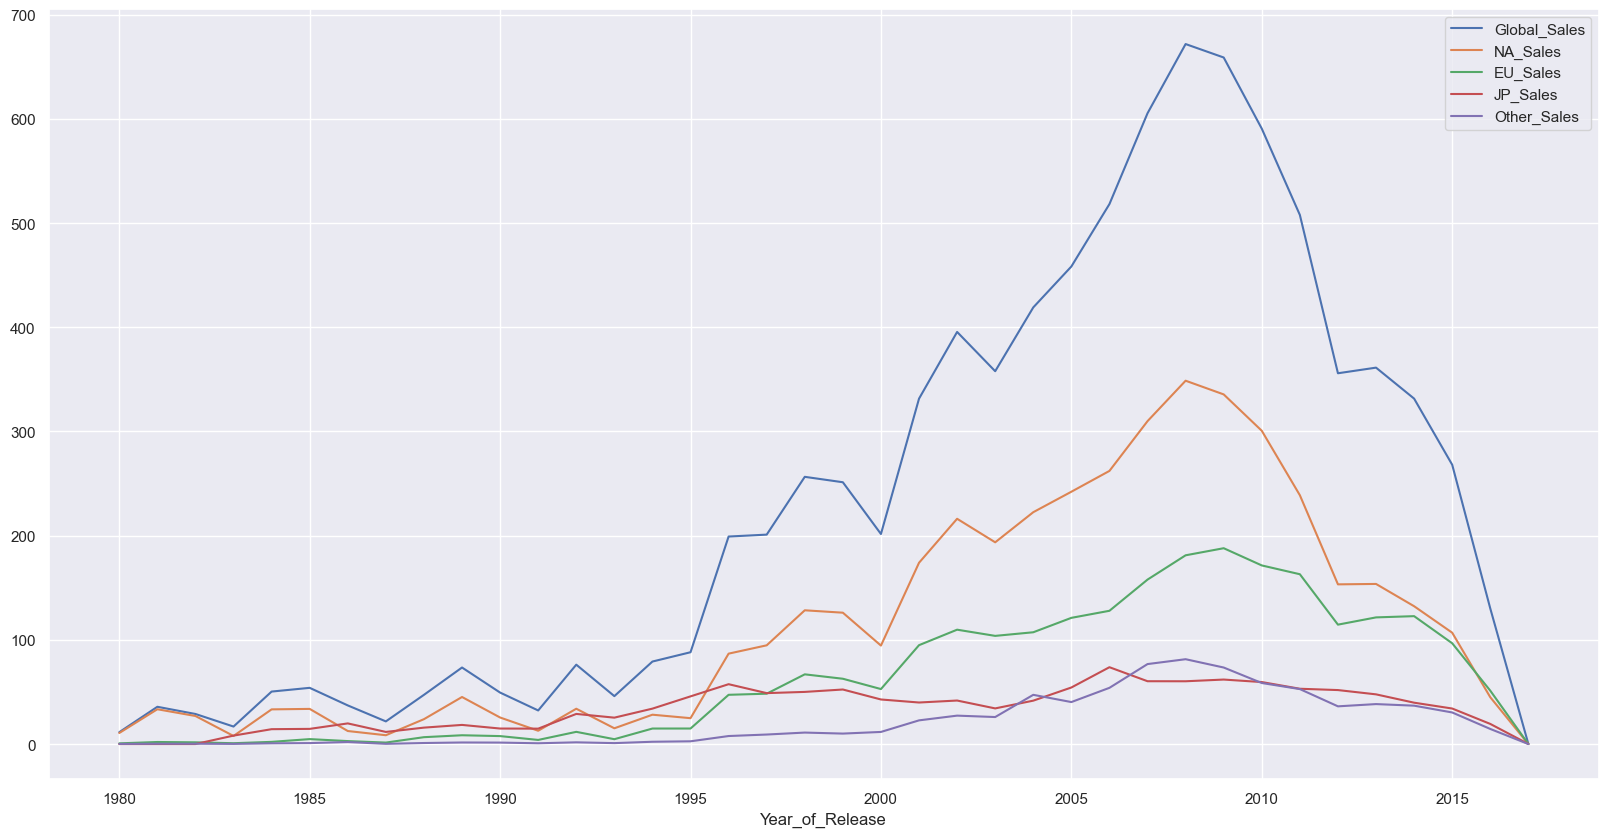

In [214]:
Global_Sales_Year = myfile.groupby('Year_of_Release')[['Global_Sales','NA_Sales','EU_Sales','JP_Sales', 'Other_Sales']].sum()
Global_Sales_Year = Global_Sales_Year.iloc[:-1]
Global_Sales_Year.plot(figsize = (20,10))

##### From the above graph it can be seen that there was a change in the trend of purchasing video games in 2008-2009.

### **Conclusion**
#### After an in-depth study, we realized that the Subprime crisis in 2008 had a profound effect on the whole world. It can be seen that the biggest changes were in the US but also in the rest of the world.

___

<div>
  <img src="https://raw.githubusercontent.com/guyuliel/Data-Analysis-Project/main/images/image 7.jpg" width="700"/>
</div>
